In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
messages = pd.read_csv("E:\\PROJECT EXCELR 2\\train_data_2000")

In [ ]:
messages.head()

,Review_Text,Review_Rating,Sentiment Class
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative
1,Seems it is now hit or miss with these shoes a...,2.0,Negative
2,My pinky toes have blisters from just a 30-min...,2.0,Negative
3,I will not be buying these again .,2.0,Negative
4,I 'm sending these back .It looks like new bal...,2.0,Negative


In [ ]:
## Get the Independent Features

X=messages.drop('Sentiment Class',axis=1)

In [ ]:
## Get the Dependent features
y=messages['Sentiment Class']

In [ ]:
message=messages.copy()

In [ ]:
message.reset_index(inplace=True)

In [ ]:
data = message['Review_Text']
data

0        The GT-1000 6 shoes do not fit anywhere as wel...
1        Seems it is now hit or miss with these shoes a...
2        My pinky toes have blisters from just a 30-min...
3                       I will not be buying these again .
4        I 'm sending these back .It looks like new bal...
                               ...                        
20813    so I 'm not sure if I was unlucky or the soles...
20814    If you can live with a split sole they are ext...
20815                          perfect height in the ankle
20816    They pinched my feet so bad as to cause pain t...
20817        But when i used i feel more pain in my feet .
Name: Review_Text, Length: 20818, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['Review_Text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy

import gensim
from gensim import corpora

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:



def lemmatization(Review_Text,allowed_postags=['NOUN']):
    output = []
    
    

    for sent in Review_Text :
        doc = nlp(sent) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return output

In [ ]:
# print("Enter 'x' for exit.");
# string = input("Enter any string to remove particular word: ");
# if string == 'x':
#     exit();
# else:
#     word = input("Enter word to be delete/remove: ");
#     print("\nDeleting given word from the given string...");
#     print("New String after successfully deleting",word);
#     word_list = string.split();
#     print(' '.join([i for i in word_list if i not in word]));

In [ ]:
text_list=message['Review_Text'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1:10]) 

Seems it is now hit or miss with these shoes as far arch support is concerned .
[['shoe', 'support'], ['pinky', 'toe', 'blister', 'run', 'sock'], [], ['m', 'back', 'balance', 'way', 'shoe'], ['product'], [], ['shoe'], ['star'], ['comfort']]


In [ ]:

## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [ ]:

lda_model.print_topics()

[(0,
  '0.108*"support" + 0.093*"color" + 0.056*"sneaker" + 0.052*"year" + 0.049*"quality" + 0.042*"comfort" + 0.025*"son" + 0.023*"problem" + 0.020*"model" + 0.020*"insole"'),
 (1,
  '0.579*"shoe" + 0.042*"running" + 0.027*"weight" + 0.022*"husband" + 0.012*"one" + 0.012*"way" + 0.011*"hour" + 0.011*"balance" + 0.010*"walking" + 0.008*"gym"'),
 (2,
  '0.235*"size" + 0.149*"foot" + 0.039*"toe" + 0.030*"heel" + 0.028*"box" + 0.026*"half" + 0.024*"cushion" + 0.018*"review" + 0.018*"width" + 0.018*"style"'),
 (3,
  '0.181*"fit" + 0.170*"pair" + 0.099*"price" + 0.039*"trail" + 0.033*"mile" + 0.027*"product" + 0.026*"brand" + 0.026*"run" + 0.018*"month" + 0.016*"week"'),
 (4,
  '0.092*"day" + 0.075*"time" + 0.054*"m" + 0.031*"lot" + 0.027*"sole" + 0.027*"bit" + 0.025*"traction" + 0.017*"issue" + 0.016*"lace" + 0.015*"pain"')]

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=81d1d137d820f19f689b6896affdd2283178940df6dabd8550886669e6946ccf
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
# libraries for visualization
import pyLDAvis

import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:

# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.375678  0.071976       1        1  26.270474
2     -0.204604  0.222821       2        1  20.474554
3     -0.071370 -0.365923       3        1  18.228097
0      0.027521  0.009586       4        1  17.847453
4     -0.127224  0.061541       5        1  17.179421, topic_info=           Term         Freq        Total Category  logprob  loglift
0          shoe  6075.000000  6075.000000  Default  30.0000  30.0000
16         size  1920.000000  1920.000000  Default  29.0000  29.0000
66          fit  1316.000000  1316.000000  Default  28.0000  28.0000
19         pair  1233.000000  1233.000000  Default  27.0000  27.0000
28         foot  1215.000000  1215.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
419        gift    47.183489    47.950321   Topic5  -4.9789   1.7453
52       insert    45.282108    46.044465   Topic5  -5.0200   1.7448
109        line    40.225071    40.989041   Topic5  -5.1384   1.7426
153  experience    39.635935    40.400552   Topic5  -5.1532   1.7424
275         bit   182.055711   285.561760   Topic5  -3.6286   1.3113

[186 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
648       2  0.976602       4e
197       5  0.975541      air
662       2  0.978263   amount
271       2  0.989897    ankle
298       4  0.990873     arch
...     ...       ...      ...
17        3  0.969618    woman
99        1  0.397075     work
99        4  0.600703     work
259       3  0.974267  workout
24        4  0.998263     year

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1, 5])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us


Perplexity:  -5.802767261353889

Coherence Score:  0.4100676805779953


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

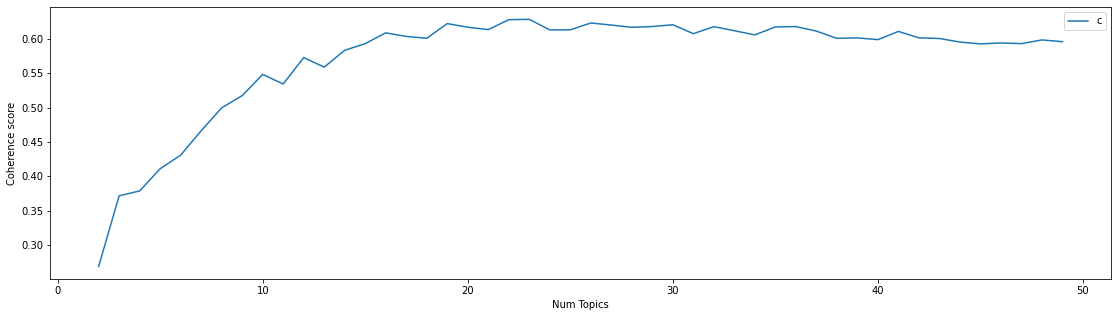

In [ ]:

# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
fig= plt.figure(figsize=(19,5))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores